In [1]:
from vertexai.preview.vision_models import ImageGenerationModel

imagen_model = ImageGenerationModel.from_pretrained("imagegeneration@005")

In [5]:
import os
import vertexai
from vertexai.preview.language_models import TextGenerationModel
from vertexai.preview.generative_models import GenerativeModel, Part
Region = "us-centra1"
GCP_PROJECT= PROJECT_ID=project_id='my-project-0004-346516'

vertexai.init()

def generate_pro(input_prompt):
    model = GenerativeModel("gemini-pro")
    responses = model.generate_content(
    input_prompt,
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 0.2,
        "top_p": 1
    },stream=True,)
    
    all_response  = []
    
    for response in responses:
        all_response.append(response.text)
    
    # print (all_response)
    
    return(" ".join(all_response))

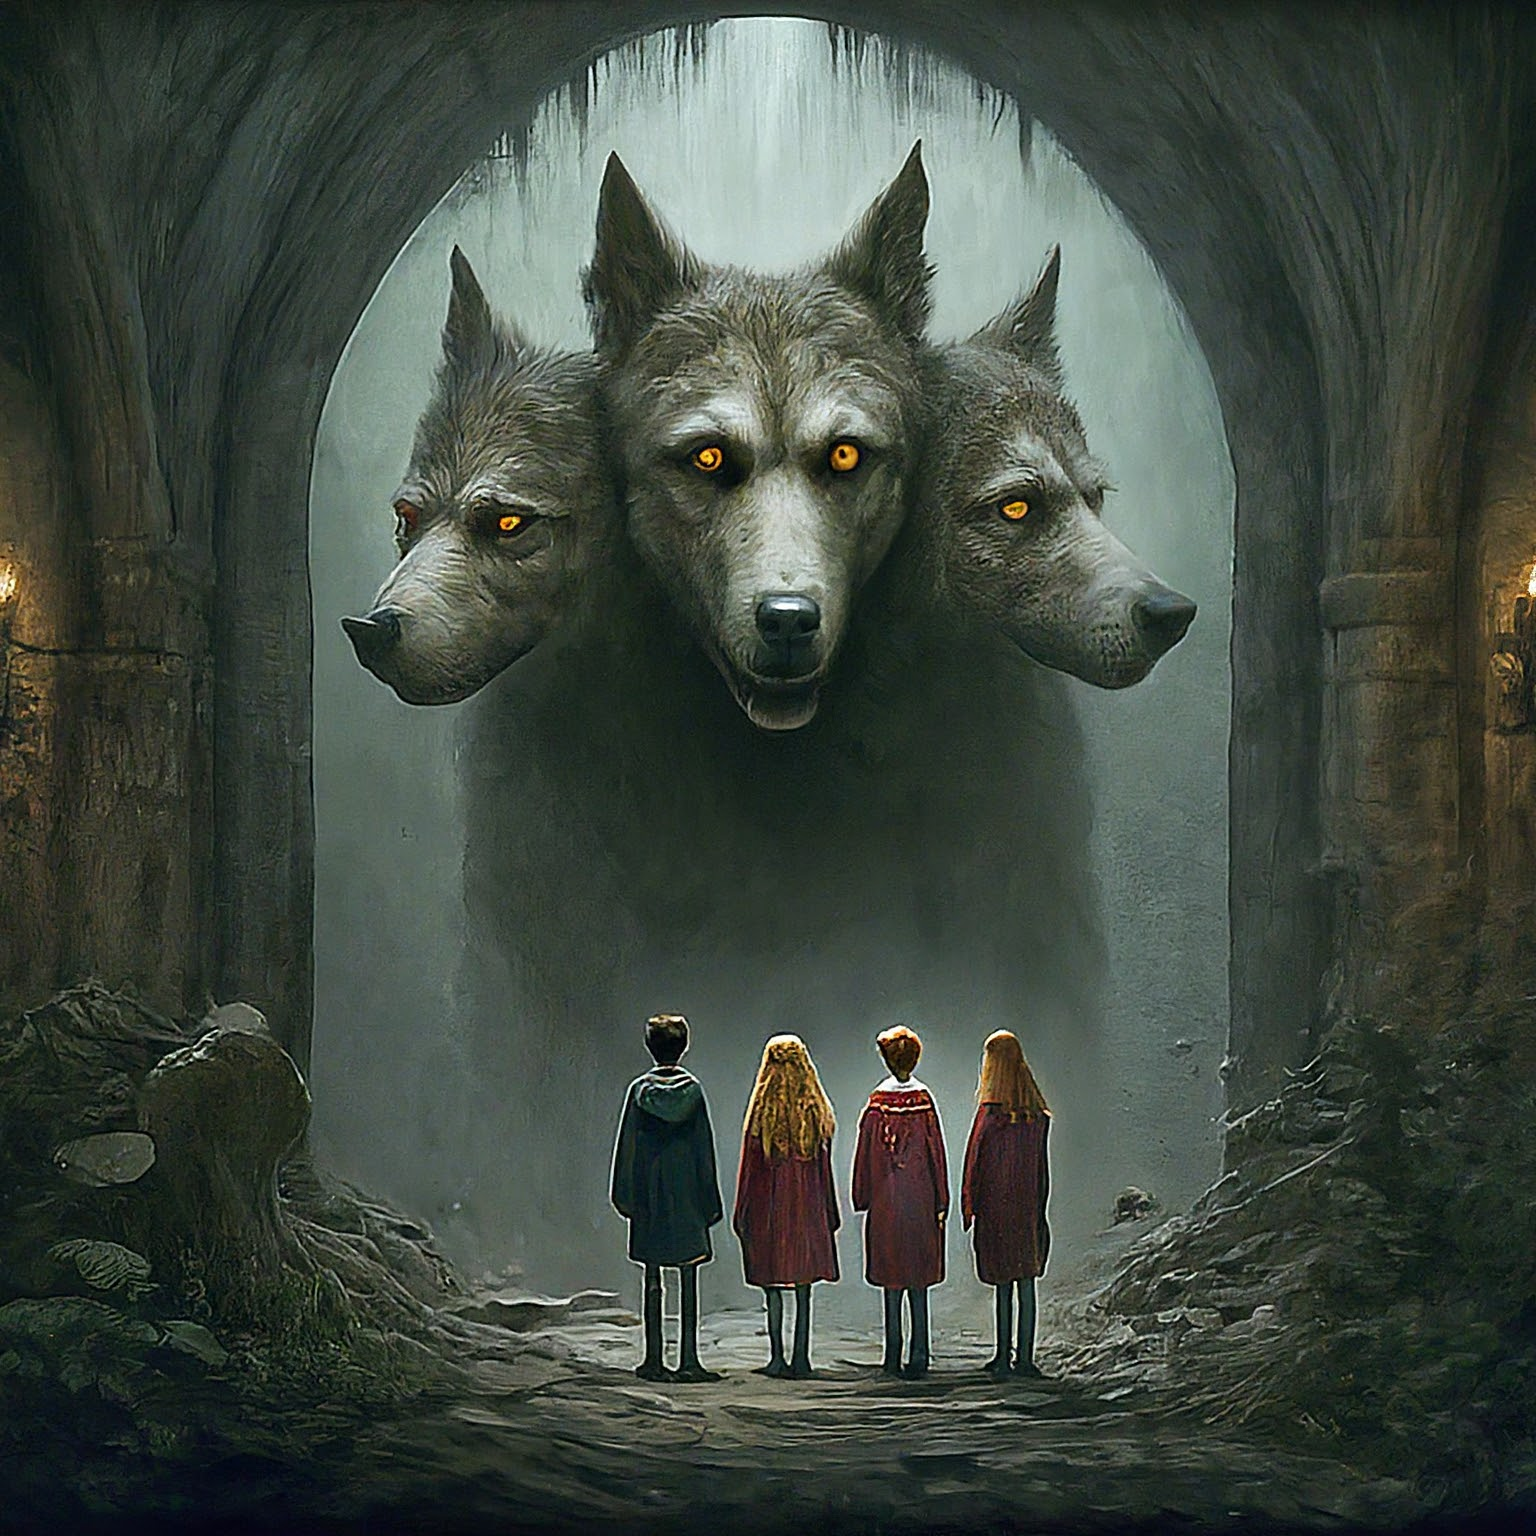

In [6]:
input_question = "What is a quote from Harry Potter and the Sorcerer's Stone"
system_prompt = " Convert this question to a meaning prompt for imagen model to create a good image"

prompt = input_question + " " + system_prompt
image_prompt = generate_pro(prompt)

response = imagen_model.generate_images(
    prompt=image_prompt,
)

response.images[0].show()